In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
from google.colab import files
uploaded = files.upload()

Saving olx_car_data_csv.csv to olx_car_data_csv.csv


In [6]:
import chardet
with open('olx_car_data_csv.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

**Create Dataset**

In [33]:
Dataset = pd.read_csv('olx_car_data_csv.csv',encoding='ISO-8859-1')

In [34]:
# Display the Data
Dataset.head(2)

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0


In [35]:
# Dataset Shape
print('The Shape of the Dataset is : {}'.format(Dataset.shape))

The Shape of the Dataset is : (24973, 9)


In [36]:
# Check Nan Values
nan_value = Dataset.isnull().sum()
print('The Nan Values in the Dataset is : \n{}'.format(nan_value))

The Nan Values in the Dataset is : 
Brand               2137
Condition           2136
Fuel                2445
KMs Driven          2286
Model               2448
Price                  0
Registered City     4636
Transaction Type    2445
Year                2284
dtype: int64


In [37]:
# Display the Information
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        22687 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              22689 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


In [12]:
# Datatype of Each Column
Dataset.dtypes

Brand                object
Condition            object
Fuel                 object
KMs Driven          float64
Model                object
Price                 int64
Registered City      object
Transaction Type     object
Year                float64
dtype: object

In [38]:
# Check the Unique Values
# Denpendent Variable
target = Dataset['Condition'].value_counts()
print('Independent Variable Unique Data Count : \n{}'.format(target))

Independent Variable Unique Data Count : 
Used    18472
New      4365
Name: Condition, dtype: int64


In [39]:
# Define the Label
Label = ['Brand' , 'Condition' , 'Fuel' , 'KMs Driven' , 'Model' , 'Price' , 'Registered City' , 'Transaction Type','Year']  

In [ ]:
# Displat the Correlation Table
correlation = Dataset.corr()
# Display the Correlation Table by using HeatMap

plt.figure(figsize = (8,6))
sns.heatmap(correlation , cmap = 'GnBu' , annot = True)
plt.show()

**Preprocessing Dataset**

In [41]:
# Convert Dataset into Dependent & Independent Matrix

X = Dataset.iloc[:,[0,2,3,4,5,6,7,8]].values
Y = Dataset.iloc[:,[1]].values
print('The Shape of the X Matrix is : {}'.format(X.shape))
print('The Shape of the Y Matrix is : {}'.format(Y.shape))

The Shape of the X Matrix is : (24973, 8)
The Shape of the Y Matrix is : (24973, 1)


In [42]:
# Handle the Nan Values

# Categorical Data
imputer = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
X[:,[0,1,3,5,6]] = imputer.fit_transform(X[:,[0,1,3,5,6]])

In [43]:
# Handle the Nan Values

# Numerical Data 
imputer_2 = SimpleImputer(missing_values = np.nan , strategy = 'mean')
X[:,[2,7]] = imputer_2.fit_transform(X[:,[2,7]])

In [44]:
# Normalize the Columns
normalize = MinMaxScaler()
X[:,[2,4,7]] = normalize.fit_transform(X[:,[2,4,7]])

In [45]:
# Handle Categorical Data  

# Apply the Label Encoder
label_encoder = LabelEncoder()   

In [46]:
# Target Matrix
Y = label_encoder.fit_transform(Y)   

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
 # Apply the OneHotEncoder
one_hot_encoder = OneHotEncoder()  
dummy_1 = one_hot_encoder.fit_transform(X[:,[0,1,3,5,6]]).toarray()

# Marge the All Data in X Matrix

X = np.hstack((dummy_1 , X[:,[2,4,7]]))

# Display the Shape of x after apply the OneHotEncoder 
print('The Shape of x is : {}'.format(X.shape))

X = X[:,0:15]

The Shape of x is : (24973, 397)


In [68]:
# Split the Dataset into (Train & Test)

x_train , x_test , y_train , y_test = train_test_split( X, Y , test_size = 0.2)

# Display the Shape of the Train & Test 
print('The Shape of X Train is : {}'.format(x_train.shape))
print('The Shape of X Test  is : {}'.format(x_test.shape))
print('The Shape of Y Train is : {}'.format(y_train.shape))
print('The Shape of Y Test  is : {}'.format(y_test.shape))

The Shape of X Train is : (19978, 15)
The Shape of X Test  is : (4995, 15)
The Shape of Y Train is : (19978,)
The Shape of Y Test  is : (4995,)


**Visualization**


In [ ]:
sns.kdeplot(x = Dataset['Price'] , shade = True , linewidth = 5 , alpha = 0.5 , edgecolor = 'black')
plt.title('Price' , fontsize = 20)
plt.show()

In [ ]:
sns.kdeplot(x = Dataset['Year'] , shade = True , linewidth = 5 , alpha = 0.5 , edgecolor = 'black')
plt.title('Year' , fontsize = 20)
plt.show()

In [ ]:
sns.kdeplot(x = Dataset['KMs Driven']  , linewidth = 5 , alpha = 0.5 , color = 'red') 
plt.title('KMs Driven' , fontsize = 20)
plt.show()

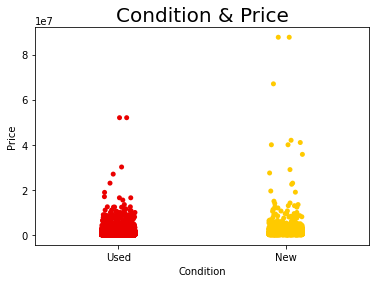

In [54]:
 sns.stripplot(x = Dataset['Condition'] , y = Dataset['Price'] , palette = 'hot')
 plt.title('Condition & Price' , fontsize = 20)
 plt.show()

**Machine Learning Model**

Logistic Regression Classifier

In [76]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

# Fit the Model 
LR.fit(x_train , y_train)

# Predict the Result 
prediction_lr = LR.predict(x_test)

In [78]:
# Actual Result of logistic Regression
Actual_res_lr = [] 

for x in prediction_lr:
  Actual_res_lr.append(Label[x])

In [79]:
# Accuracy of the Logistic Regression
accuracy_score_lr = accuracy_score(prediction_lr , y_test)
print(accuracy_score_lr)

0.7427427427427428


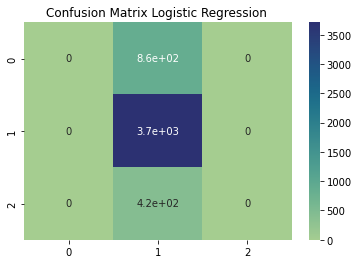

In [80]:
# Confusion Matrix of Logistic Regression
confusion_lr = confusion_matrix(y_test , prediction_lr)

# Display Confusion Matrix by using Heatmap
sns.heatmap(confusion_lr , cmap = 'crest' , annot = True)
plt.title('Confusion Matrix Logistic Regression ' , fontsize = 12)
plt.show()

In [81]:
# Classification Report of Logistic Regression
report_lr = classification_report(y_test , prediction_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       860
           1       0.74      1.00      0.85      3710
           2       0.00      0.00      0.00       425

    accuracy                           0.74      4995
   macro avg       0.25      0.33      0.28      4995
weighted avg       0.55      0.74      0.63      4995



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN Classifier**

In [83]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Classifier = KNeighborsClassifier(n_neighbors = 9)
# Fit the model 
KNN_Classifier.fit(x_train , y_train)
# Predict the Result 
prediction_knn = KNN_Classifier.predict(x_test)

In [85]:
# Actual Result of KNN Classifier 
Actual_res_knn = [] 

for x in prediction_knn:
  Actual_res_knn.append(Label[x])
print(Actual_res_knn)

['Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Condition', 'Condition', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Brand', 'Condition', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Condition', 'Condition', 'Condition', 'Brand', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Condition', 'Condition', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Brand', 'Condition', 'Brand', 'Condition', 'Condition', 'Condition', 'Condition', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Brand', 'Brand', 'Brand', 'Condition', 'Brand', 'Brand', '

In [87]:
# Accuracy of the KNN Classifier
accuracy_score_knn = accuracy_score(prediction_knn , y_test)
accuracy_score_knn

0.32432432432432434

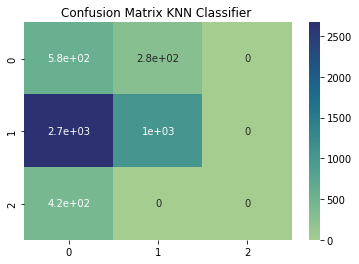

In [88]:
# Confusion Matrix of KNN Classifier 
confusion_knn = confusion_matrix(y_test , prediction_knn)

# Display Confusion Matrix by using Heatmap
sns.heatmap(confusion_knn , cmap = 'crest' , annot = True)
plt.title('Confusion Matrix KNN Classifier ' , fontsize = 12)
plt.show()

In [89]:
# Classification Report of KNN Classifier 
report_knn = classification_report(y_test , prediction_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.16      0.67      0.26       860
           1       0.79      0.28      0.41      3710
           2       0.00      0.00      0.00       425

    accuracy                           0.32      4995
   macro avg       0.32      0.32      0.22      4995
weighted avg       0.61      0.32      0.35      4995



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Machine (SVC)**


In [90]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')

# Fit the model 
svc.fit(x_train , y_train)

# Predict the Result 
prediction_svc = svc.predict(x_test)

In [91]:
# Actual Result of SVC classifier
Actual_res_svc = [] 

for x in prediction_svc:
  Actual_res_svc.append(Label[x])


In [92]:
# Accuracy of the SVC classifier
accuracy_score_svc = accuracy_score(prediction_svc , y_test)

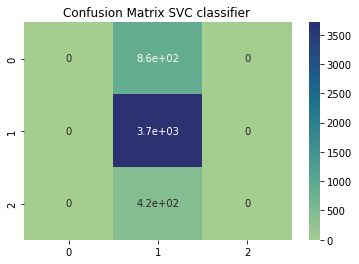

In [93]:
# Confusion Matrix of SVC classifier
confusion_svc = confusion_matrix(y_test , prediction_svc)

# Display Confusion Matrix by using Heatmap
sns.heatmap(confusion_svc , cmap = 'crest' , annot = True)
plt.title('Confusion Matrix SVC classifier ' , fontsize = 12)
plt.show()

In [94]:
# Classification Report of SVC classifier
report_svc = classification_report(y_test , prediction_svc)
print(report_svc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       860
           1       0.74      1.00      0.85      3710
           2       0.00      0.00      0.00       425

    accuracy                           0.74      4995
   macro avg       0.25      0.33      0.28      4995
weighted avg       0.55      0.74      0.63      4995



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree Classifier**


In [95]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

#fit the model 
DT.fit(x_train, y_train)
#predict the results
prediction_DT = DT.predict (x_test)

In [96]:
# Actual Result of DT classifier
Actual_res_DT = [] 

for x in prediction_DT:
  Actual_res_DT.append(Label[x])


In [97]:
# Accuracy of the DT classifier
accuracy_score_DT = accuracy_score(prediction_DT , y_test)

In [98]:
print('The Accuracy of the Decision Tree Classifier is : {}'.format(accuracy_score_DT))

The Accuracy of the Decision Tree Classifier is : 0.7427427427427428


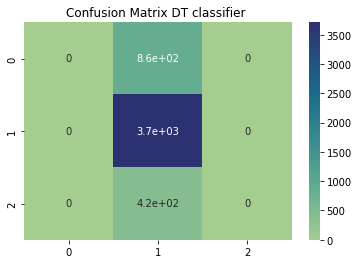

In [99]:
# Confusion Matrix of DT classifier
confusion_DT = confusion_matrix(y_test , prediction_DT)

# Display Confusion Matrix by using Heatmap
sns.heatmap(confusion_DT , cmap = 'crest' , annot = True)
plt.title('Confusion Matrix DT classifier ' , fontsize = 12)
plt.show()

In [100]:
# Classification Report of DT classifier
report_DT = classification_report(y_test , prediction_DT)
print(report_DT)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       860
           1       0.74      1.00      0.85      3710
           2       0.00      0.00      0.00       425

    accuracy                           0.74      4995
   macro avg       0.25      0.33      0.28      4995
weighted avg       0.55      0.74      0.63      4995



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Tree**

In [101]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

# Fit the Model
RF.fit(x_train, y_train)

#predict the result
prediction_RF = RF.predict (x_test)

In [102]:
# Actual Result of RF classifier
Actual_res_RF = [] 

for x in prediction_RF:
  Actual_res_RF.append(Label[x])

In [103]:
# Accuracy of the RF classifier
accuracy_score_RF = accuracy_score(prediction_RF , y_test)

In [109]:
print('The Accuracy of the Random Forest Classifier is : {}'.format(accuracy_score_RF))

The Accuracy of the Random Forest Classifier is : 0.7427427427427428


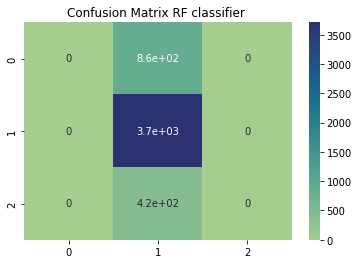

In [110]:
# Confusion Matrix of RF classifier
confusion_RF = confusion_matrix(y_test , prediction_RF)

# Display Confusion Matrix by using Heatmap
sns.heatmap(confusion_RF , cmap = 'crest' , annot = True)
plt.title('Confusion Matrix RF classifier ' , fontsize = 12)
plt.show()

In [111]:
# Classification Report of RF classifier
report_RF = classification_report(y_test , prediction_RF)
print(report_RF)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       860
           1       0.74      1.00      0.85      3710
           2       0.00      0.00      0.00       425

    accuracy                           0.74      4995
   macro avg       0.25      0.33      0.28      4995
weighted avg       0.55      0.74      0.63      4995



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model Evaluation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


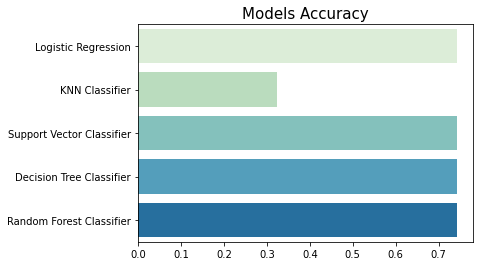

In [108]:
# Accuracy of the Models
Score = [(accuracy_score_lr) , (accuracy_score_knn ) , (accuracy_score_svc ) , (accuracy_score_DT ) , (accuracy_score_RF )]
# Models Name
Algorithm = ['Logistic Regression' , 'KNN Classifier' , 'Support Vector Classifier' , 'Decision Tree Classifier' , 'Random Forest Classifier']

# Display the Accuracy of the Each Model by using bar plot
sns.barplot(Score , Algorithm , palette = 'GnBu')
plt.title('Models Accuracy' , fontsize = 15)
plt.show()